  # Example 2 from the PHREEQC Manual.
  See: https://wwwbrr.cr.usgs.gov/projects/GWC_coupled/phreeqc/phreeqc3-html/phreeqc3-57.htm#50528271_28577  
  
  The example deals with the relative stability of gypsum and anhydrite as a function of temperature. A solution is brought into equilibrium with a finite quanity of each phase. The less stable phase is converted into the more stable phase. Gypsum is the more stable phase for T < 55 C; anhydrite is more stable for T > 55 C.

In [1]:
import reaktoro as rkt
import numpy as np
import matplotlib.pyplot as plt

## Develop calculation approach at a single temperature

In [2]:
# Define system with aq. species and gibbsite mineral
db = rkt.PhreeqcDatabase("phreeqc.dat")
solution = rkt.AqueousPhase(rkt.speciate("H O Ca S"))
solution.setActivityModel(rkt.ActivityModelDebyeHuckelPHREEQC())
Gypsum = rkt.MineralPhase("Gypsum")
Anhydrite = rkt.MineralPhase("Anhydrite")
system = rkt.ChemicalSystem(db, solution, Gypsum, Anhydrite)

# Create a solver with fixed T, P, and P_CO2 that can be charge balanced by adjusting pH
specs = rkt.EquilibriumSpecs(system)
specs.temperature()
specs.pressure()
specs.pH()
solver = rkt.EquilibriumSolver(specs)

# Set an initial state for the solution
state = rkt.ChemicalState(system)
state.temperature(25.0, "celsius")
state.pressure(1.0, "atm")
state.set("H2O", 1.0, "kg")
state.set("Gypsum", 1, "mol")
state.set("Anhydrite", 1, "mol")


# Set conditions
conditions = rkt.EquilibriumConditions(specs)
conditions.temperature(75, "celsius")
conditions.pressure(1, "atm")
conditions.pH(7.0)

# Equilibrate
solver.solve(state, conditions)

# print("FINAL STATE")
# print(state)

aprops = rkt.AqueousProps(state)

print("AQUEOUS PROPERTIES AT EQUILIBRIUM")
print(aprops)

AQUEOUS PROPERTIES AT EQUILIBRIUM
+---------------------------------+-------------+-------+
| Property                        |       Value |  Unit |
+---------------------------------+-------------+-------+
| Temperature                     |    348.1500 |     K |
| Pressure                        |      1.0132 |   bar |
| Ionic Strength (Effective)      |      0.0243 | molal |
| Ionic Strength (Stoichiometric) |      0.0363 | molal |
| pH                              |      7.0000 |       |
| pE                              |     -3.8788 |       |
| Eh                              |     -0.2680 |     V |
| Charge Molality                 | -2.1208e-06 | molal |
| Element Molality:               |             |       |
| :: S                            |  9.0778e-03 | molal |
| :: Ca                           |  9.0778e-03 | molal |
| Species Molality:               |             |       |
| :: H+                           |  1.1240e-07 | molal |
| :: SO4-2                        |  6

In [3]:
print(aprops.saturationIndex("Anhydrite"))
print(aprops.saturationIndex("Gypsum"))

-2.28296e-09
-0.194987


## Loop over temperature values from 25 to 75 C

In [16]:
# Define system with aq. species and gibbsite mineral
db = rkt.PhreeqcDatabase("phreeqc.dat")
solution = rkt.AqueousPhase(rkt.speciate("H O Ca S"))
solution.setActivityModel(rkt.ActivityModelDebyeHuckelPHREEQC())
Gypsum = rkt.MineralPhase("Gypsum")
Anhydrite = rkt.MineralPhase("Anhydrite")
system = rkt.ChemicalSystem(db, solution, Gypsum, Anhydrite)

# Create a solver with fixed T, P, and P_CO2 that can be charge balanced by adjusting pH
specs = rkt.EquilibriumSpecs(system)
specs.temperature()
specs.pressure()
specs.pH()
solver = rkt.EquilibriumSolver(specs)

# Set an initial state for the solution
state = rkt.ChemicalState(system)
state.temperature(25.0, "celsius")
state.pressure(1.0, "atm")
state.set("H2O", 1.0, "kg")
state.set("Gypsum", 1, "mol")
state.set("Anhydrite", 1, "mol")

# Create function to output SI of Gypsum and Anhydrite
def SatIndexCalc(T):
    # Set conditions
    conditions = rkt.EquilibriumConditions(specs)
    conditions.temperature(T, "celsius")
    conditions.pressure(1, "atm")
    conditions.pH(7.0)

    # Equilibrate
    solver.solve(state, conditions)

    # print("FINAL STATE")
    # print(state)

    aprops = rkt.AqueousProps(state)

    # print("AQUEOUS PROPERTIES AT EQUILIBRIUM")
    # print(aprops)
    return [aprops.saturationIndex("Gypsum")[0], aprops.saturationIndex("Anhydrite")[0]]

# Perform loop over Temperature
T_arr = np.linspace(25,75)
output = [SatIndexCalc(T) for T in T_arr]

## Plot results

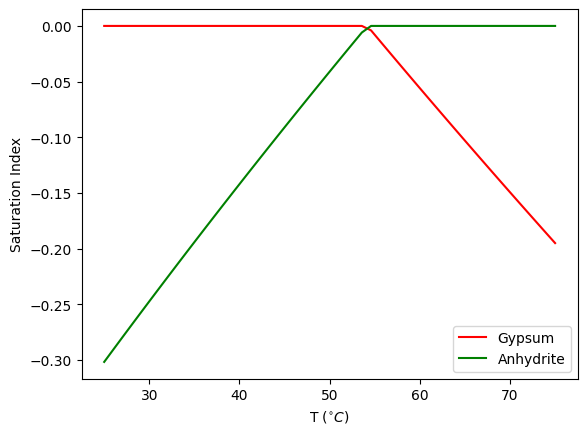

In [17]:
plt.plot(T_arr, np.array(output)[:,0], 'r-', label='Gypsum')
plt.plot(T_arr, np.array(output)[:,1], 'g-', label='Anhydrite')
plt.xlabel('T ($^{\circ} C$)')
plt.ylabel('Saturation Index')
plt.legend()